In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:09<00:00, 154MB/s]
100% 1.06G/1.06G [00:09<00:00, 120MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.regularizers import l2

In [6]:
# this is the augmentation configuration we will use for training
batch_size=24
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'content/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# New Section

In [7]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation ='relu', input_shape =(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation ='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation ='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation ='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation ='relu'))
model.add(layers.Dense(1, activation ="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [23]:
for layer in model.layers:
 # check for convolutional layer
 if 'conv' not in layer.name:
     continue
 # get filter weights
 filters, biases = layer.get_weights()
 print(layer.name, filters.shape)


conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 64)
conv2d_2 (3, 3, 64, 128)
conv2d_3 (3, 3, 128, 128)


In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
834/834 [==============================] - 1217s 1s/step - loss: 0.6756 - accuracy: 0.5643 - val_loss: 0.6275 - val_accuracy: 0.6610
Epoch 2/10
834/834 [==============================] - 1196s 1s/step - loss: 0.5854 - accuracy: 0.6876 - val_loss: 0.5118 - val_accuracy: 0.7420
Epoch 3/10
834/834 [==============================] - 1183s 1s/step - loss: 0.4783 - accuracy: 0.7681 - val_loss: 0.4412 - val_accuracy: 0.7998
Epoch 4/10
834/834 [==============================] - 1200s 1s/step - loss: 0.4055 - accuracy: 0.8119 - val_loss: 0.3628 - val_accuracy: 0.8400
Epoch 5/10
834/834 [==============================] - 1236s 1s/step - loss: 0.3554 - accuracy: 0.8409 - val_loss: 0.3531 - val_accuracy: 0.8426
Epoch 6/10
834/834 [==============================] - 1192s 1s/step - loss: 0.3114 - accuracy: 0.8613 - val_loss: 0.3257 - val_accuracy: 0.8726
Epoch 7/10
834/834 [==============================] - 1199s 1s/step - loss: 0.2791 - accuracy: 0.8781 - val_loss: 0.2990 - val_accuracy:

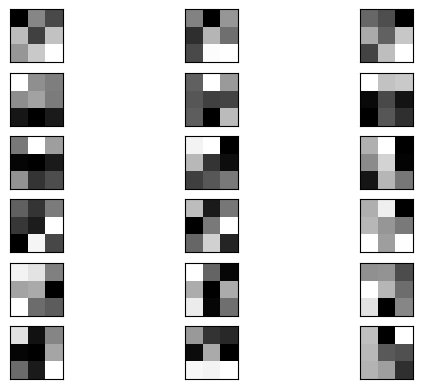

In [11]:
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
 # get the filter
 f = filters[:, :, :, i]
 # plot each channel separately
 for j in range(3):
 # specify subplot and turn of axis
  ax = plt.subplot(n_filters, 3, ix)
  ax.set_xticks([])
  ax.set_yticks([])
 # plot filter channel in grayscale
  plt.imshow(f[:, :, j], cmap='gray')
  ix += 1
# show the figure
plt.show()

(1, 150, 150, 3)


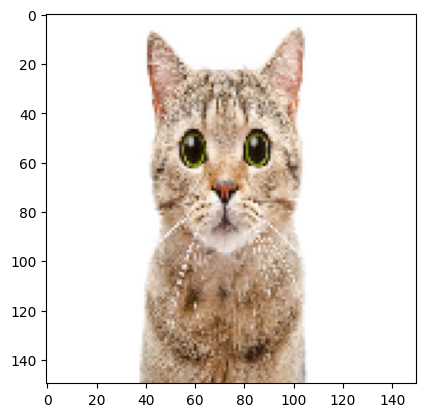

In [13]:
from keras.preprocessing import image
import numpy as np
img= image.load_img("/content/cat.jpg",target_size=(150,150))
img_tensor=image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.

# Print image tensor shape
print(img_tensor.shape)

# Print image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

1/1 [==============================] - 0s 97ms/step
(1, 74, 74, 32)


<ipython-input-16-b32b004a60a7>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(first_layer_activation[0, :, :, i], cmap ='viridis')


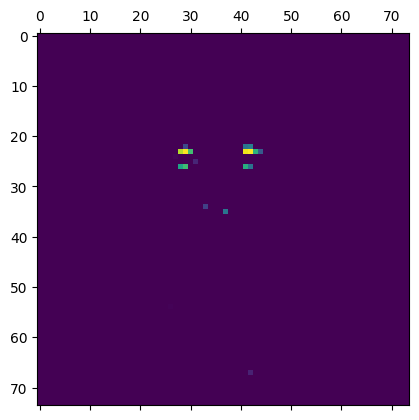

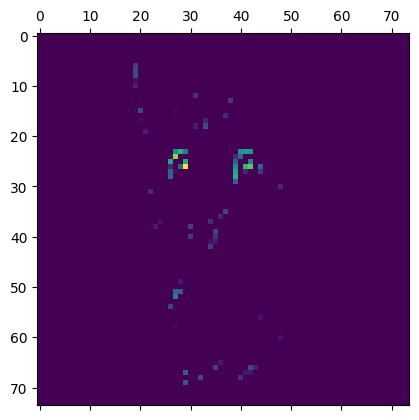

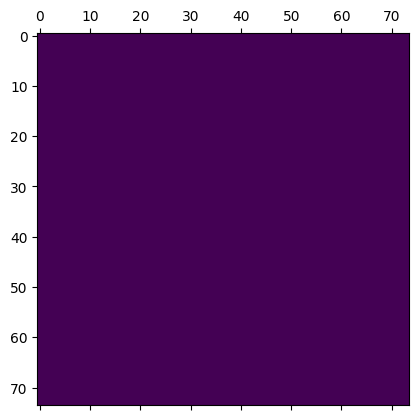

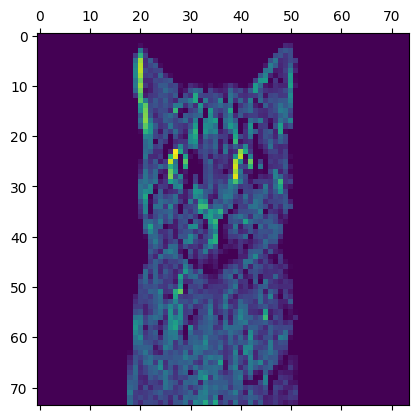

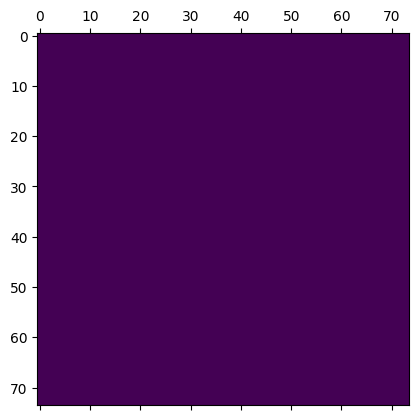

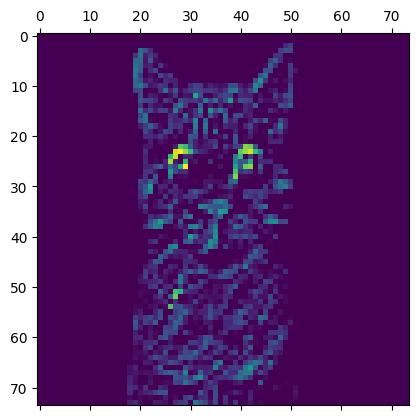

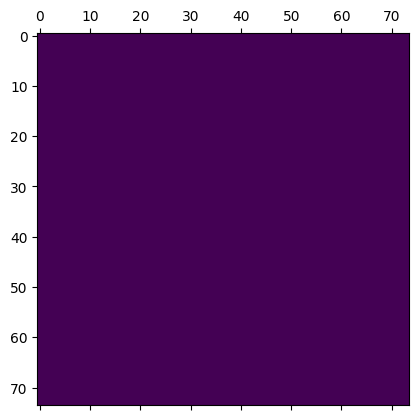

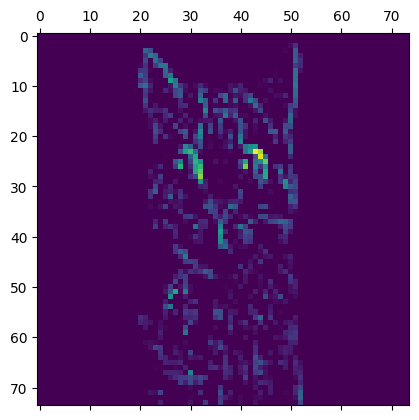

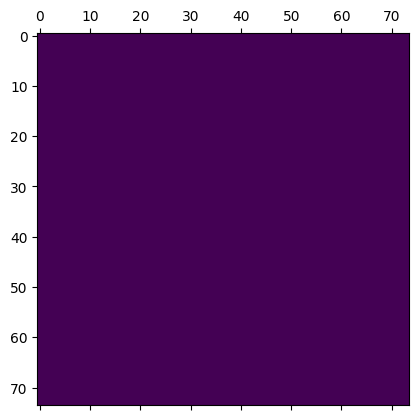

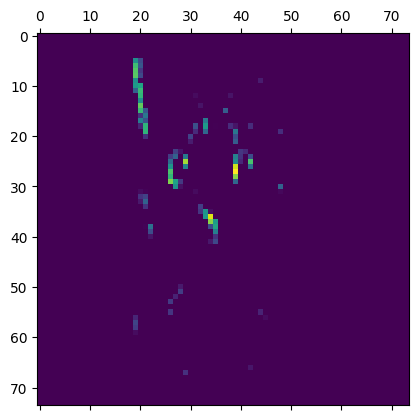

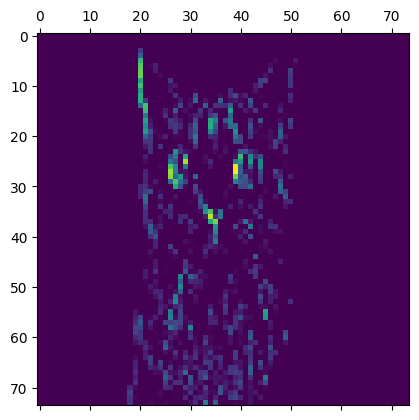

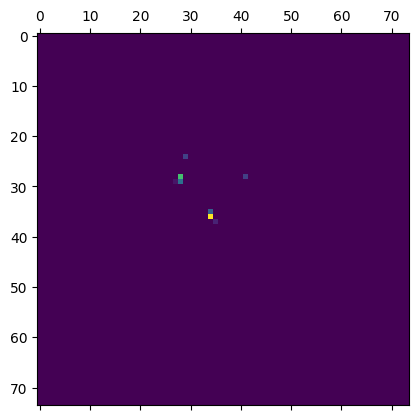

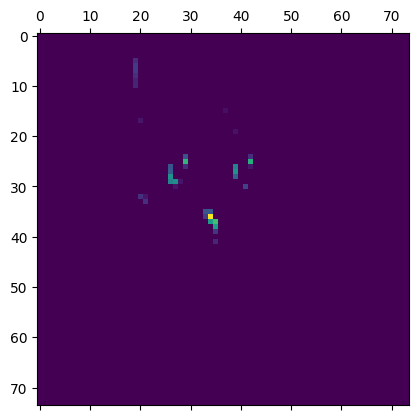

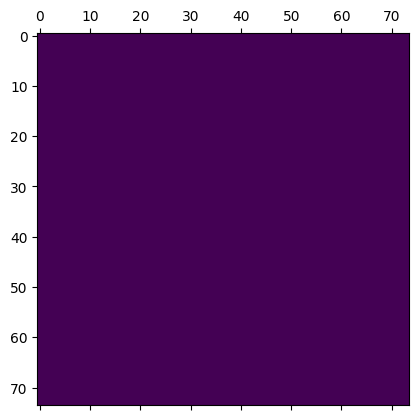

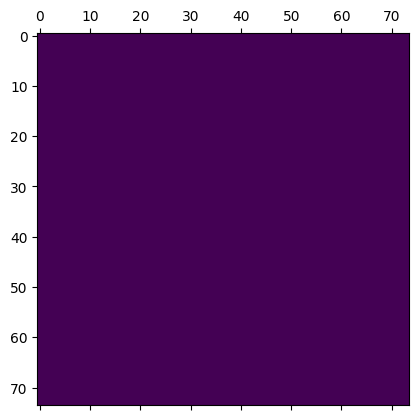

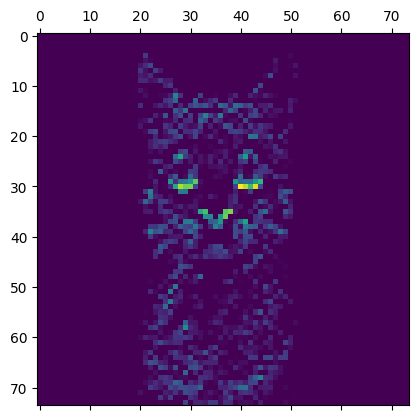

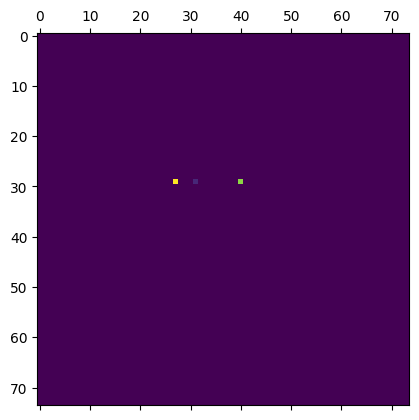

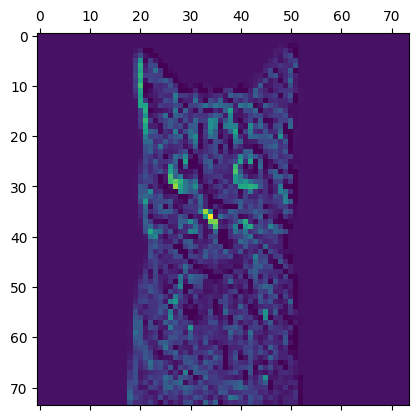

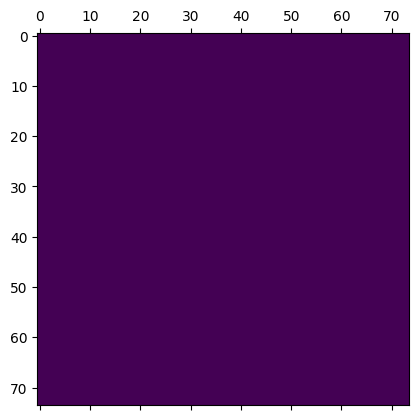

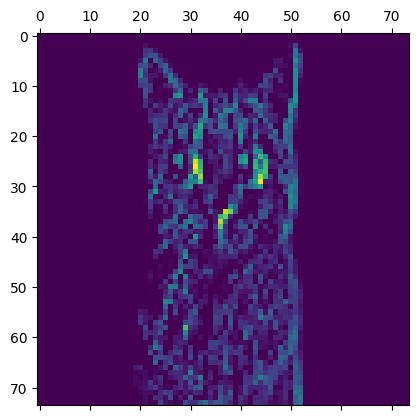

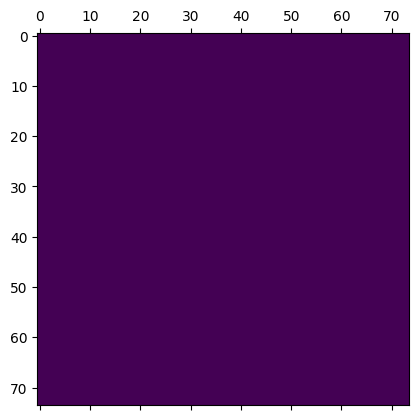

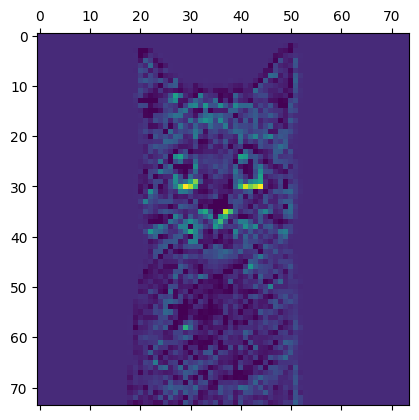

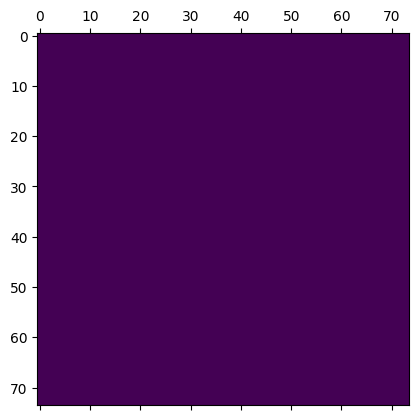

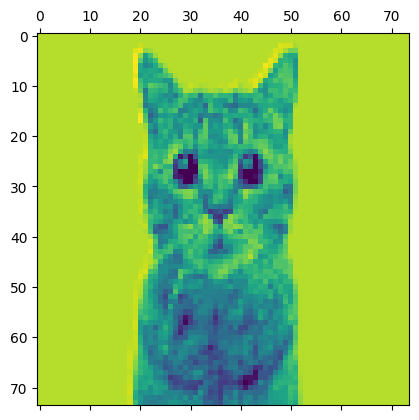

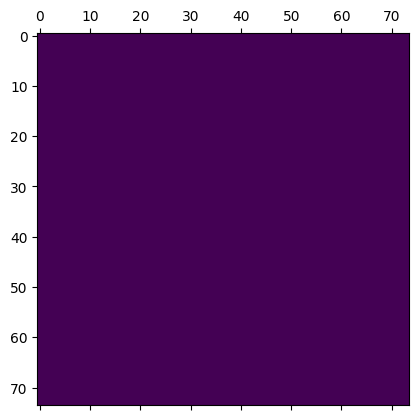

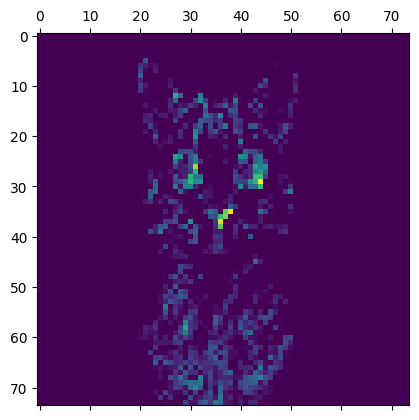

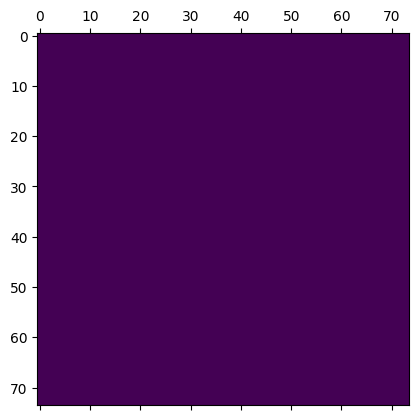

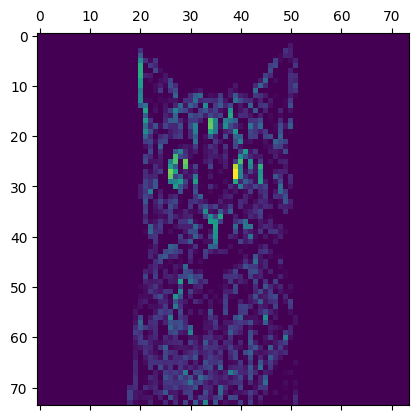

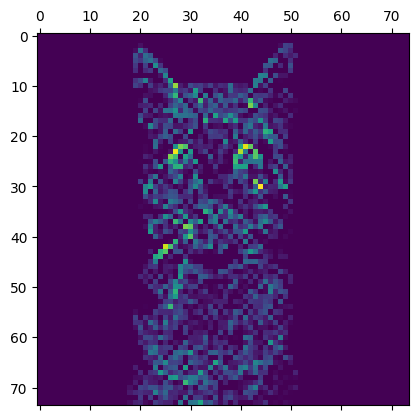

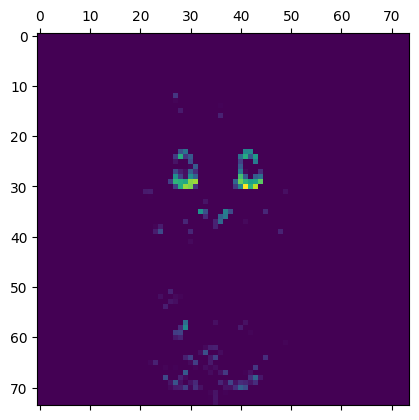

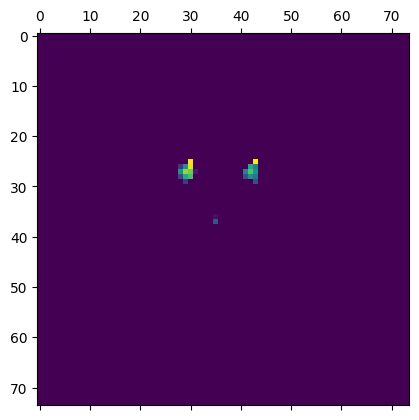

In [16]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

# Getting Activations of first layer
first_layer_activation = activations[1]

# shape of first layer activation
print(first_layer_activation.shape)

for i in range(1,first_layer_activation.shape[3]):

  plt.matshow(first_layer_activation[0, :, :, i], cmap ='viridis')



1/1 [==============================] - 0s 213ms/step
(1, 74, 74, 32)


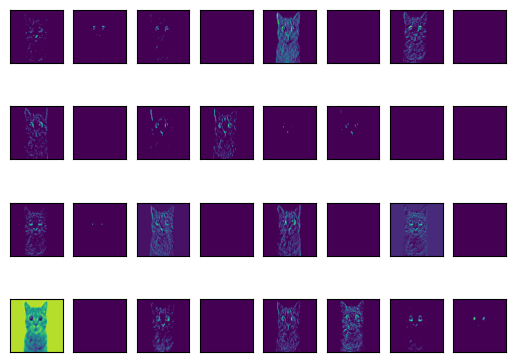

In [19]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

# Getting Activations of first layer
first_layer_activation = activations[1]
square=4
rec=8
ix=1
# shape of first layer activation
print(first_layer_activation.shape)
for _ in range(square):
 for j in range(rec):
 # specify subplot and turn of axis
  ax = plt.subplot(square, rec, ix)
  ax.set_xticks([])
  ax.set_yticks([])
 # plot filter channel in grayscale
  plt.imshow(first_layer_activation[0, :, :, ix-1], cmap='viridis')
  ix += 1
# show the figure
plt.show()


1/1 [==============================] - 0s 154ms/step
(1, 7, 7, 128)


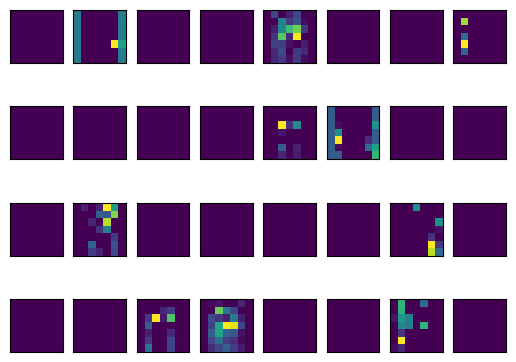

In [24]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

# Getting Activations of first layer
first_layer_activation = activations[7]
square=4
rec=8
ix=1
# shape of first layer activation
print(first_layer_activation.shape)
for _ in range(square):
 for j in range(rec):
 # specify subplot and turn of axis
  ax = plt.subplot(square, rec, ix)
  ax.set_xticks([])
  ax.set_yticks([])
 # plot filter channel in grayscale
  plt.imshow(first_layer_activation[0, :, :, ix-1], cmap='viridis')
  ix += 1
# show the figure
plt.show()


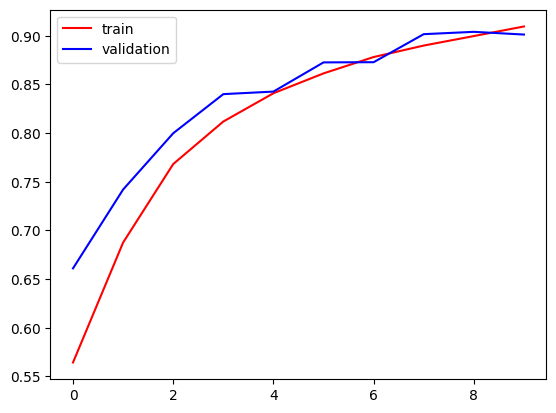

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

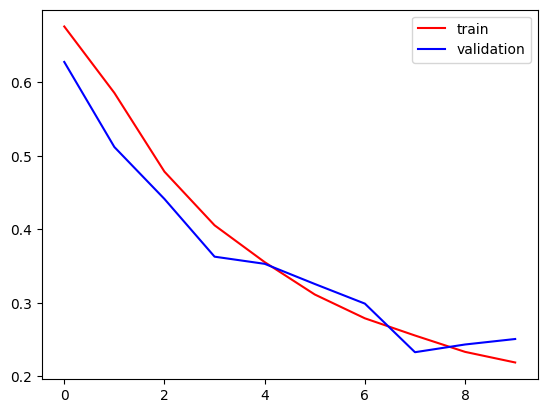

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [28]:

#
model.predict(img_tensor)

1/1 [==============================] - 0s 71ms/step


array([[1.3392194e-05]], dtype=float32)